In [1]:
from nbarrier import n_barrier
from ROOT import TCanvas, TGraph

import ROOT
import numpy as np

ROOT.gROOT.Reset()

Welcome to ROOTaaS 6.06/01


In [2]:
barrier = 2             # number of potential barriers
barrier_width = 10e-9   # barrier width (m), 10 Angstrom = 1e-9m = 1nm
well_width    = 4e-9    # well width (m)
V0 = 0.240              # barrier energy (eV),height of barrier
                        # 1 eV = 1.60217733e-19 J
Emax    =  V0 + 0.1
npoints = 100000          # number of points in energy plot


In [3]:
initial_value = n_barrier(barrier,barrier_width,well_width,V0,npoints,Emax)

Trans, E = initial_value.transmission()

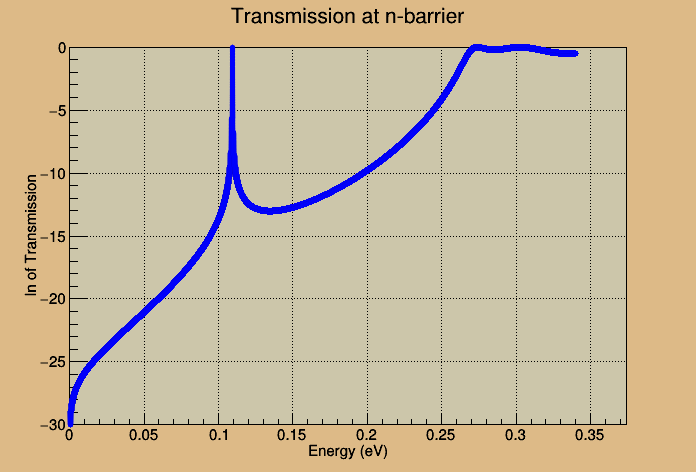

In [4]:
c1 = TCanvas( 'c1', 'A Simple Graph Example', 200, 10, 700, 500 )

c1.SetFillColor( 42 )
c1.SetGrid()

gr = TGraph( npoints, E, np.log(Trans) )
#gr.SetLineColor( 2 )
gr.SetLineWidth( 4 )
#gr.SetMarkerColor( 4 )
#gr.SetMarkerStyle( 21 )
gr.SetTitle( 'Transmission at n-barrier' )
gr.GetXaxis().SetTitle( 'Energy (eV)' )
gr.GetXaxis().CenterTitle()
# gr.GetXaxis().SetBinLabel(1,"test")
# gr.GetXaxis().SetBinLabel(5,"test2")
# gr.GetXaxis().SetBinLabel(10,"test3")


gr.GetYaxis().CenterTitle()
gr.GetYaxis().SetTitle( 'ln of Transmission' )
gr.GetYaxis().SetRangeUser(-30.0,0.0 )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 12 )
c1.Modified()
c1.Update()
c1.Draw()

In [5]:
max_index=np.argmax(np.log(Trans))
print 'The transmitted electron has energy %.2f meV' % (E[max_index]*1000)


The transmitted electron has energy 302.67 meV
